In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('C:\\\\Users\kimte\\git\\data-analytics-and-science\\exercises\\exercise 3 - Twitter sentiment analysis\\data\\train.csv')
df.shape
type(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
id       31962 non-null int64
label    31962 non-null int64
tweet    31962 non-null object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [4]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [6]:
df.set_index("id", inplace=True)

In [7]:
df.head()

,label,tweet
id,,
1,0,@user when a father is dysfunctional and is s...
2,0,@user @user thanks for #lyft credit i can't us...
3,0,bihday your majesty
4,0,#model i love u take with u all the time in ...
5,0,factsguide: society now #motivation


In [8]:
df["label"].value_counts()

0    29720
1     2242
Name: label, dtype: int64

### Cleaning: https://towardsdatascience.com/another-twitter-sentiment-analysis-bb5b01ebad90 of https://github.com/tthustla/twitter_sentiment_analysis_part1/blob/master/Capstone_part2.ipynb

In [13]:
df['pre_clean_len'] = [len(t) for t in df["tweet"]]

count    31962.000000
mean        84.739628
std         29.455749
min         11.000000
25%         63.000000
50%         88.000000
75%        108.000000
max        274.000000
Name: pre_clean_len, dtype: float64

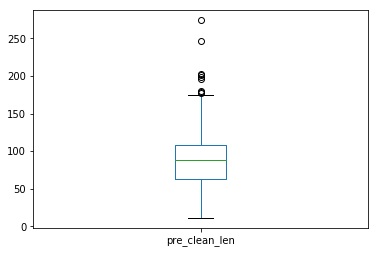

In [15]:
ax = df['pre_clean_len'].plot.box()
df['pre_clean_len'].describe()

In [16]:
df[df.pre_clean_len > 140].head(10)

,label,tweet,pre_clean_len
id,,,
8,0,the next school year is the year for exams.ð...,143
336,0,watching the @user leadership embrace &amp; ki...,146
434,0,@user * sweets ð°ð©ð¬ð­ð«â¨!!!!!! ...,145
475,0,this is a shockingly and increasingly #viole...,141
566,0,thank youðsoo muchð pretty @user i feel ...,142
621,0,@user back to @user after a v traumatic few m...,141
774,0,ðð»#pretending#to#be #when #you're#in#pai...,151
775,0,@user @user @user @user @user evening my de...,147
1101,0,2nite was sad bc i ordered fries @ denny's &am...,141


In [17]:
df.loc[8,"tweet"]

"the next school year is the year for exams.ð\x9f\x98¯ can't think about that ð\x9f\x98\xad #school #exams   #hate #imagine #actorslife #revolutionschool #girl"

In [22]:
from bs4 import BeautifulSoup
example1 = BeautifulSoup(df.loc[8,"tweet"], 'lxml')
print(example1.get_text())

the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams   #hate #imagine #actorslife #revolutionschool #girl


In [28]:
from bs4 import BeautifulSoup
x = BeautifulSoup(df["tweet"].any(), 'lxml')

In [29]:
x

<html><body><p>@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run</p></body></html>

In [31]:
from bs4 import BeautifulSoup
import re
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()
pat1 = r'@[A-Za-z0-9]+'
pat2 = r'https?://[A-Za-z0-9./]+'
combined_pat = r'|'.join((pat1, pat2))

def tweet_cleaner(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    stripped = re.sub(combined_pat, '', souped)
    try:
        clean = stripped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        clean = stripped
    letters_only = re.sub("[^a-zA-Z]", " ", clean)
    lower_case = letters_only.lower()
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = tok.tokenize(lower_case)
    return (" ".join(words)).strip()

testing = df["tweet"][:100]

test_result = []
for t in testing:
    test_result.append(tweet_cleaner(t))
test_result

['when a father is dysfunctional and is so selfish he drags his kids into his dysfunction run',
 'thanks for lyft credit i can t use cause they don t offer wheelchair vans in pdx disapointed getthanked',
 'bihday your majesty',
 'model i love u take with u all the time in ur',
 'factsguide society now motivation',
 'huge fan fare and big talking before they leave chaos and pay disputes when they get there allshowandnogo',
 'camping tomorrow danny',
 'the next school year is the year for exams can t think about that school exams hate imagine actorslife revolutionschool girl',
 'we won love the land allin cavs champions cleveland clevelandcavaliers',
 'welcome here i m it s so gr',
 'ireland consumer price index mom climbed from previous to in may blog silver gold forex',
 'we are so selfish orlando standwithorlando pulseshooting orlandoshooting biggerproblems selfish heabreaking values love',
 'i get to see my daddy today days gettingfed',
 'cnn calls michigan middle school build the wa

In [43]:
running = df["tweet"][:]

running_result = []
for t in running:
    running_result.append(tweet_cleaner(t))
df["tweet_clean"] = running_result

In [44]:
df.head()

,label,tweet,pre_clean_len,tweet_clean
id,,,,
1,0,@user when a father is dysfunctional and is s...,102,when a father is dysfunctional and is so selfi...
2,0,@user @user thanks for #lyft credit i can't us...,122,thanks for lyft credit i can t use cause they ...
3,0,bihday your majesty,21,bihday your majesty
4,0,#model i love u take with u all the time in ...,86,model i love u take with u all the time in ur
5,0,factsguide: society now #motivation,39,factsguide society now motivation


### https://towardsdatascience.com/another-twitter-sentiment-analysis-with-python-part-2-333514854913

In [48]:
df.isnull().sum()

label            0
tweet            0
pre_clean_len    0
tweet_clean      0
dtype: int64

*installeren wordcloud: conda install -c conda-forge wordcloud

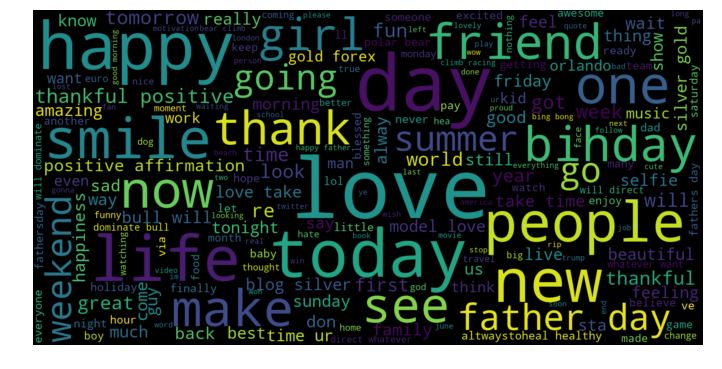

In [60]:
neg_tweets = df[df["label"] == 0]
neg_string = []
for t in neg_tweets["tweet_clean"]:
    neg_string.append(t)
neg_string = pd.Series(neg_string).str.cat(sep=' ')

from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(neg_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

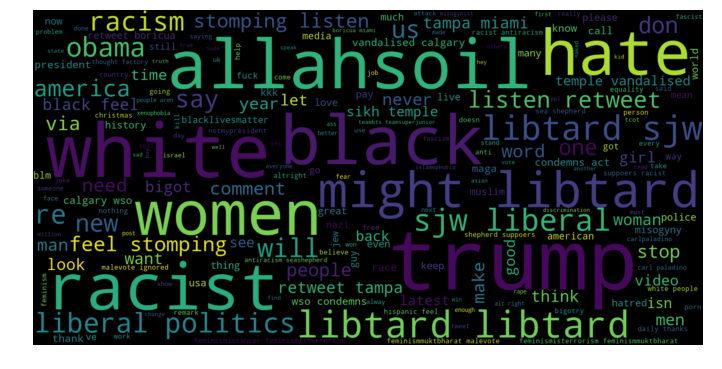

In [61]:
neg_tweets = df[df["label"] == 1]
neg_string = []
for t in neg_tweets["tweet_clean"]:
    neg_string.append(t)
neg_string = pd.Series(neg_string).str.cat(sep=' ')

from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(neg_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()